# Random Forest

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import math

# I'm using this guide as my reference: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

## Import CSV file

In [38]:
features = pd.read_csv('output.csv')
# print("Full list of all column names:")
# for signal in features.columns:
#     print(signal)
display(features)

,timestamps,IMUAccelerationSignal1,IMUAccelerationSignal2,IMUAccelerationSignal3,IMURotationalAccelerationSignal1,IMURotationalAccelerationSignal2,IMURotationalAccelerationSignal3,FrontLeftWheelRotSpeed,FLTireCombinedSlip,FLTireLongitudinalSlip,...,RRTireLongitudinalSlip,YawAngle,VehicleSideSlip,PitchAngle,RollAngle,VehicleMass,CoGAccelerationSignal1,SteeringWheelAng,AccelerationPedalPosition,BrakePedalPosition
0,0.00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.763538e+01,0.025261,0.020279,...,0.018746,0.000000e+00,0.000000e+00,0.000726,0.000000e+00,2113.0,0.000000,0.00,0.9,0.0
1,0.01,-0.399903,3.381164e-07,-0.087218,2.154627e-07,8.655944e-02,8.842118e-08,3.846107e+01,0.003806,-0.003009,...,-0.002130,1.102977e-12,4.346364e-11,0.000732,2.571933e-12,2113.0,-0.375010,0.00,0.9,0.0
2,0.02,-0.192478,1.115148e-06,0.045476,7.316415e-07,2.388031e-02,2.747243e-07,3.843294e+01,0.001308,-0.000836,...,-0.001108,1.318252e-11,2.736328e-10,0.000745,3.277860e-11,2113.0,-0.185555,0.00,0.9,0.0
3,0.03,-0.258041,1.720578e-06,0.055958,1.163028e-06,3.764213e-02,3.778104e-07,3.828084e+01,0.003121,0.002424,...,0.003440,5.352696e-11,7.603806e-10,0.000762,1.401644e-10,2113.0,-0.247140,0.00,0.9,0.0
4,0.04,-0.403705,2.032940e-06,0.023671,1.390021e-06,7.592145e-02,3.829092e-07,3.831077e+01,0.001447,0.001008,...,0.001821,1.317082e-10,1.401602e-09,0.000783,3.656557e-10,2113.0,-0.381785,0.00,0.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,19.96,-0.000017,-8.002418e-05,-0.000010,-9.938923e-06,2.647248e-06,-6.222613e-05,-1.924308e-12,0.000460,0.000436,...,-0.000745,2.415607e-01,0.000000e+00,0.000120,6.055171e-04,2113.0,-0.000018,1.92,0.0,0.9
1997,19.97,-0.000017,-1.093048e-04,-0.000009,-1.675144e-05,2.014346e-06,-7.932454e-05,-1.898155e-12,0.000457,0.000439,...,-0.000757,2.415608e-01,0.000000e+00,0.000120,6.056206e-04,2113.0,-0.000018,1.92,0.0,0.9
1998,19.98,-0.000017,-1.322358e-04,-0.000008,-2.253086e-05,1.353443e-06,-9.191586e-05,-1.872371e-12,0.000455,0.000443,...,-0.000770,2.415608e-01,0.000000e+00,0.000120,6.057224e-04,2113.0,-0.000017,1.92,0.0,0.9
1999,19.99,-0.000016,-1.477595e-04,-0.000006,-2.700216e-05,6.840511e-07,-9.944198e-05,-1.846917e-12,0.000453,0.000447,...,-0.000784,2.415608e-01,0.000000e+00,0.000120,6.058218e-04,2113.0,-0.000015,1.92,0.0,0.9


## Pre-Processing of Dataset

The lateral slip in Dyna4 $s_y$ is defined as:
$s_y = \frac{v_y - (r_{dyn} \cdot \Omega)}{\mid r_{dyn} \cdot \Omega \mid \cdot v_{num}}$
For more information, see the 'Slip Calculation' help document from Dyna4.

For a free rolling tire the following relation between lateral slip  and slip angle $\alpha$ is:
$\alpha = \arctan(s_y)$
This is the equation, we have to apply to the signal called TireLateralSlip for each wheel.

In [39]:
#Changing LateralSlip as explained above
for index, row in features.iterrows():
    features.at[index,'FRTireLateralSlip'] = math.atan(row['FRTireLateralSlip'])
    features.at[index,'FLTireLateralSlip'] = math.atan(row['FLTireLateralSlip'])
    features.at[index,'RLTireLateralSlip'] = math.atan(row['RLTireLateralSlip'])
    features.at[index,'RRTireLateralSlip'] = math.atan(row['RRTireLateralSlip'])                                                                   

## Define Targets and Features, and Split on Training and Test Data

In [40]:
# Separate features and targets
targets = np.array(features['VehicleSideSlip'])

# Remove the targets from the features
features = features.drop('VehicleSideSlip', axis = 1)

# Removing other values that we shouldn't train on:
features = features.drop('YawAngle', axis = 1)
features = features.drop('PitchAngle', axis = 1)
features = features.drop('RollAngle', axis = 1)
features = features.drop('FRTireLateralSlip', axis = 1)
features = features.drop('FLTireLateralSlip', axis = 1)
features = features.drop('RLTireLateralSlip', axis = 1)
features = features.drop('RRTireLateralSlip', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

# Split the data into training and testing sets
train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size = 0.25, random_state = 42)

# Checking that the shapes look correct
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_targets.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_targets.shape)

Training Features Shape: (1500, 37)
Training Labels Shape: (1500,)
Testing Features Shape: (501, 37)
Testing Labels Shape: (501,)


## Train and Test Model

In [ ]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_targets)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_targets)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
# mape = 100 * (errors / test_targets)
# # Calculate and display accuracy
# accuracy = 100 - np.mean(mape)
# print('Accuracy:', round(accuracy, 2), '%.')

## Post Analysis of Results

Variable: FRTireCombinedMaxForce Importance: 0.19
Variable: FRTireCombinedSlip   Importance: 0.13
Variable: FRTireLongitudinalSlip Importance: 0.13
Variable: FRTireContactPointForceSignal3 Importance: 0.11
Variable: FLTireLongitudinalSlip Importance: 0.08
Variable: CoGAccelerationSignal1 Importance: 0.08
Variable: timestamps           Importance: 0.04
Variable: IMUAccelerationSignal1 Importance: 0.04
Variable: FLTireCombinedSlip   Importance: 0.03
Variable: IMUAccelerationSignal3 Importance: 0.02
Variable: IMURotationalAccelerationSignal3 Importance: 0.02
Variable: IMUAccelerationSignal2 Importance: 0.01
Variable: IMURotationalAccelerationSignal1 Importance: 0.01
Variable: IMURotationalAccelerationSignal2 Importance: 0.01
Variable: FLTireCombinedForce  Importance: 0.01
Variable: FLTireCombinedMaxForce Importance: 0.01
Variable: FLTireContactPointForceSignal3 Importance: 0.01
Variable: FRTireCombinedForce  Importance: 0.01
Variable: RLTireContactPointForceSignal3 Importance: 0.01
Variab

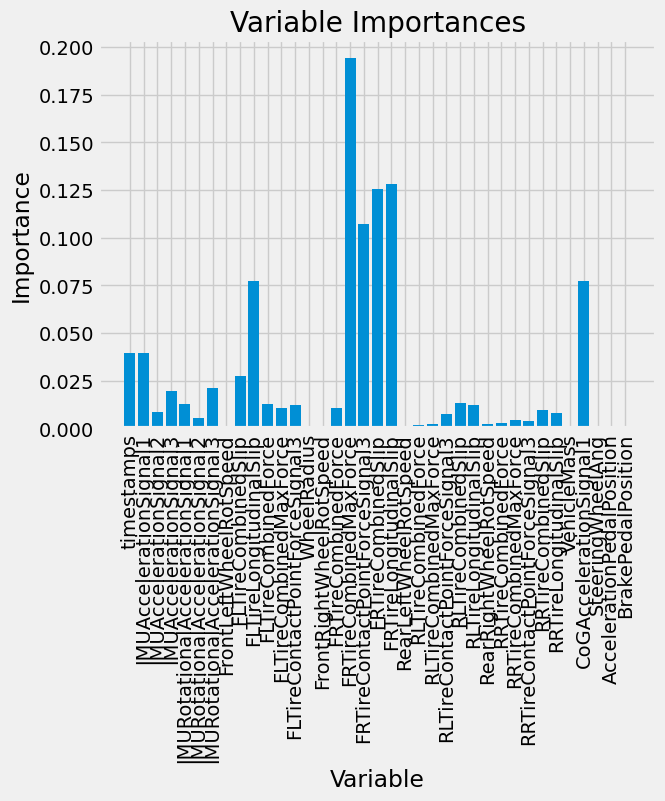

In [42]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');